# explore notebook for history staar scores

In [1]:
import pandas as pd
import prepare as p
import personal_functions as pf
import summarize as s
import explore as e
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


pd.options.display.max_columns = None
pd.options.display.width = 100
pd.options.display.max_colwidth = None
pd.options.display.max_rows = 200

In [2]:
df = p.clean_df()
df.to_csv('cleaned_data.csv')

In [3]:
df.head()

,school_id,english_1,english_2,algebra,biology,history,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu
0,1902001,67.0,82.0,95.0,88.0,93.0,1.2,34.3,55259.0,16.4,1852.0,10656.0,10.1,18.0,65.6,22.0
1,1903001,75.0,87.0,76.0,92.0,93.0,1.3,34.5,48689.0,21.6,2056.0,11177.0,8.3,27.2,51.2,29.4
2,1904001,78.0,80.0,90.0,87.0,88.0,4.7,42.2,51538.0,15.2,2151.0,10885.0,8.8,42.2,42.6,37.0
3,1906002,82.0,80.0,100.0,100.0,96.0,2.9,48.1,58500.0,20.4,1899.0,15043.0,11.9,20.5,59.1,9.8
4,1907001,64.0,66.0,82.0,83.0,83.0,13.8,79.9,52703.0,17.4,1504.0,11129.0,12.2,22.7,59.9,20.8


In [4]:
df.history.max()

100.0

In [5]:
df.drop(columns= ['school_id', 'english_1', 'english_2', 'algebra', 'biology'], axis= 1, inplace= True)

In [6]:
train, val, test = e.tts(df)

In [7]:
train.shape, val.shape, test.shape

((778, 11), (334, 11), (279, 11))

(array([  1.,   5.,   5.,  21., 126., 222., 238., 145.,  14.,   1.]),
 array([30166. , 34842.7, 39519.4, 44196.1, 48872.8, 53549.5, 58226.2,
        62902.9, 67579.6, 72256.3, 76933. ]),
 <BarContainer object of 10 artists>)

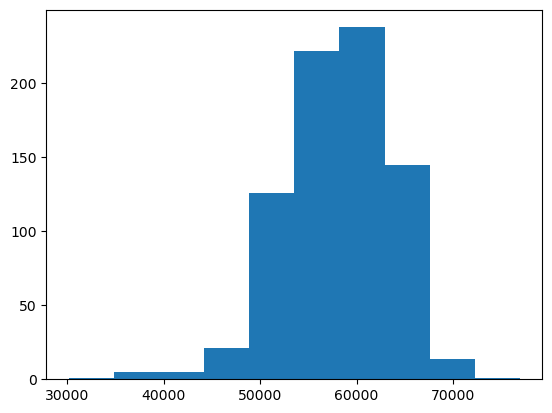

In [8]:
plt.hist(train.salary)

<AxesSubplot:xlabel='history', ylabel='Count'>

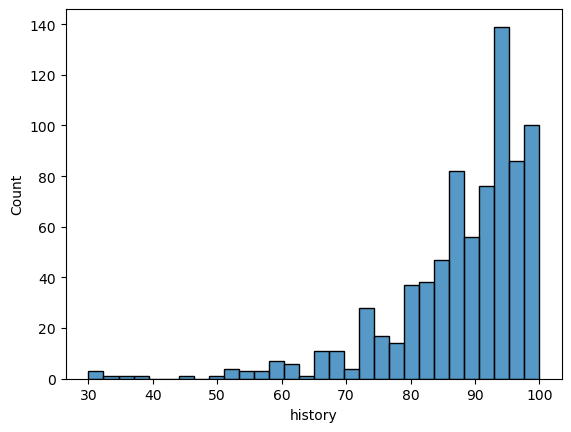

In [9]:
sns.histplot(train.history)

<AxesSubplot:>

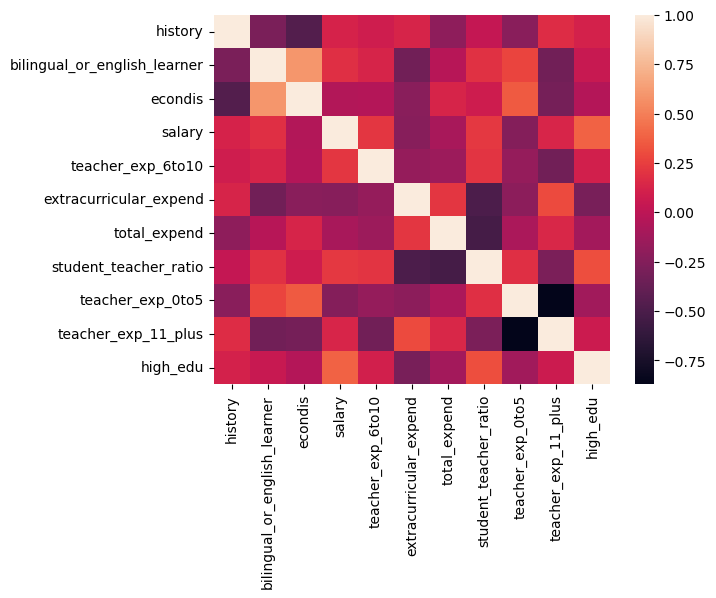

In [10]:
sns.heatmap(df.corr())
# strongest correlation with history scores: econdis, bilingual_or_english_learner
# teacher_exp_0to5
#total expenditures per student
#

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='history'>

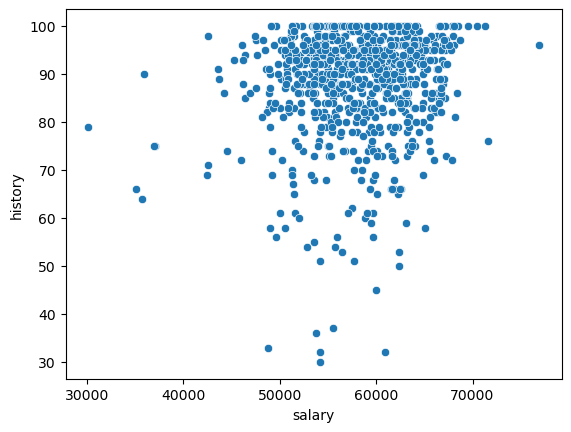

In [11]:
sns.scatterplot(train.salary, train.history)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='econdis', ylabel='history'>

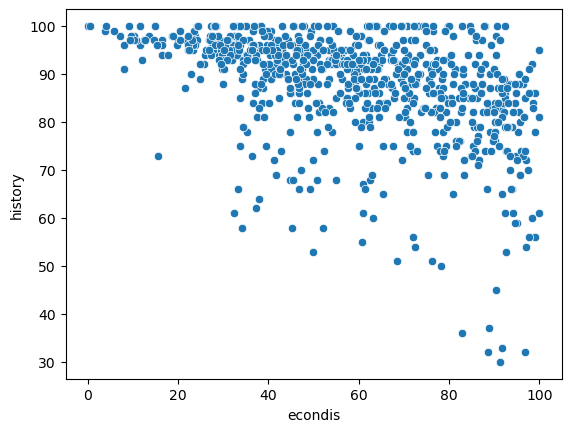

In [12]:
sns.scatterplot(train.econdis, train.history)

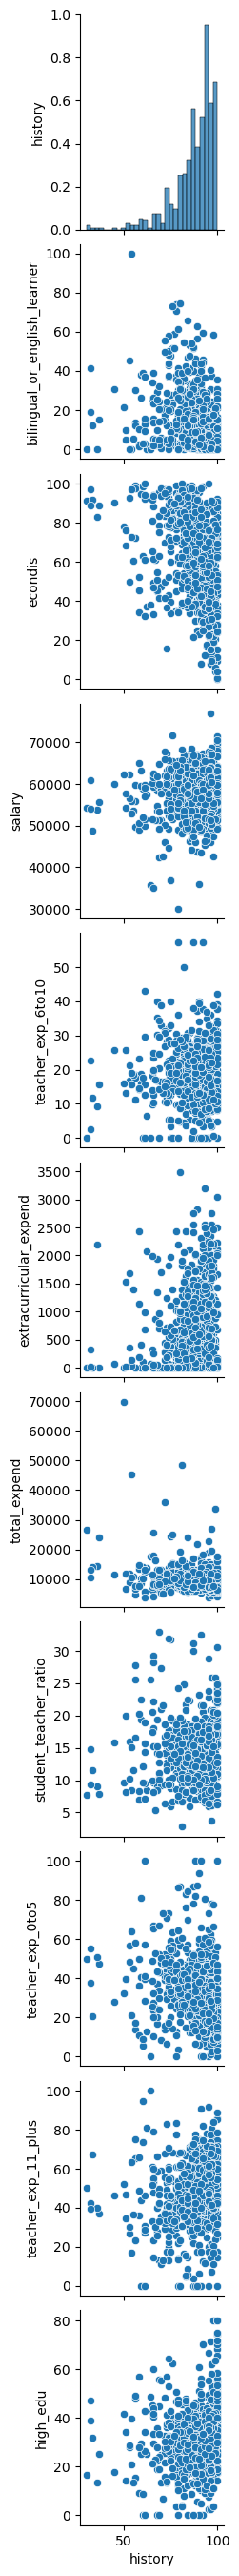

In [13]:
sns.pairplot(train, x_vars= 'history')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='econdis', ylabel='history'>

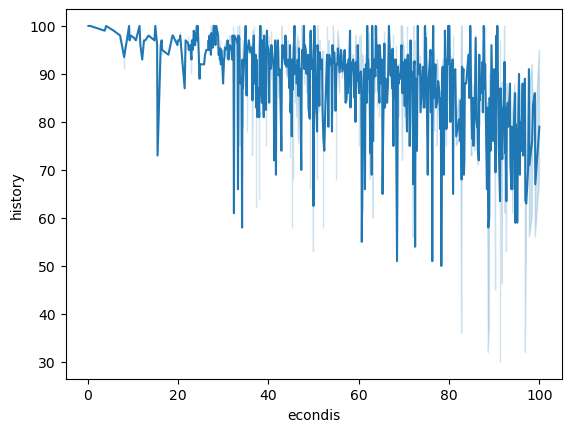

In [14]:
sns.lineplot(train['econdis'], train['history'])

In [15]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
history,778.0,87.829049,11.026017,30.0,84.000,91.00,95.000,100.0
bilingual_or_english_learner,778.0,12.965810,13.922691,0.0,3.100,7.95,17.600,99.6
econdis,778.0,58.517352,23.370603,0.2,40.525,59.25,77.900,100.0
salary,778.0,58004.344473,5638.828007,30166.0,54193.000,58371.00,62232.250,76933.0
teacher_exp_6to10,778.0,19.362339,8.024472,0.0,14.525,19.70,24.000,57.1
extracurricular_expend,778.0,710.056555,660.432793,0.0,176.250,530.00,1072.000,3487.0
total_expend,778.0,9817.897172,4317.452991,3954.0,7590.000,8921.50,10961.750,69687.0
student_teacher_ratio,778.0,14.293316,4.298317,2.8,11.200,14.20,16.600,33.0
teacher_exp_0to5,778.0,32.119794,15.361363,0.0,22.425,30.20,39.200,100.0
teacher_exp_11_plus,778.0,48.519923,16.172298,0.0,39.825,49.00,59.375,100.0


In [16]:
#getting count of schools in the 75th percentile of economic disadvantage
train[train['econdis'] >= 77.9].count()

history                         196
bilingual_or_english_learner    196
econdis                         196
salary                          196
teacher_exp_6to10               196
extracurricular_expend          196
total_expend                    196
student_teacher_ratio           196
teacher_exp_0to5                196
teacher_exp_11_plus             196
high_edu                        196
dtype: int64

- Q1: Does higher spending on extracurricular activities lead to higher scores?
- Q2: Do lower percentage of economic disadvantage generally result in higher overall schools?
- Q3: Does higher than bachelor's education make a difference in history staar scores?
- Q4: Do the different levels of teacher experience correlate with higher scores?  Is one of them stronger than the others?


In [17]:
x_axis = ['extracurricular_expend' , 'econdis' , 'high_edu' , 'teacher_exp_0to5' , 'teacher_exp_11_plus']

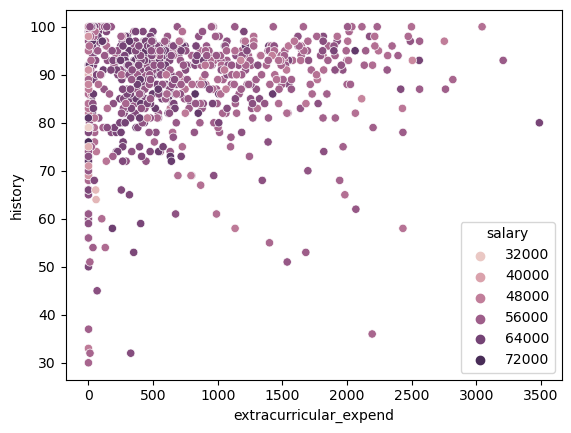

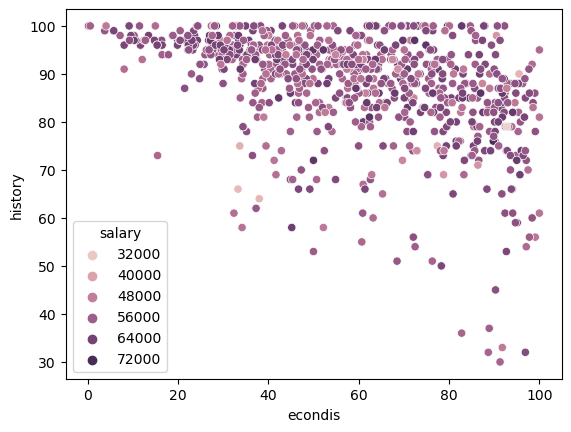

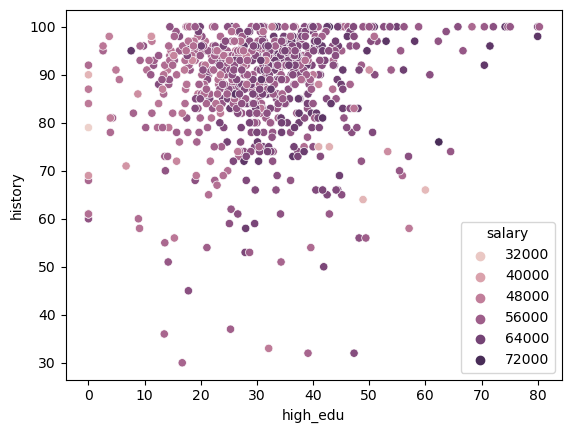

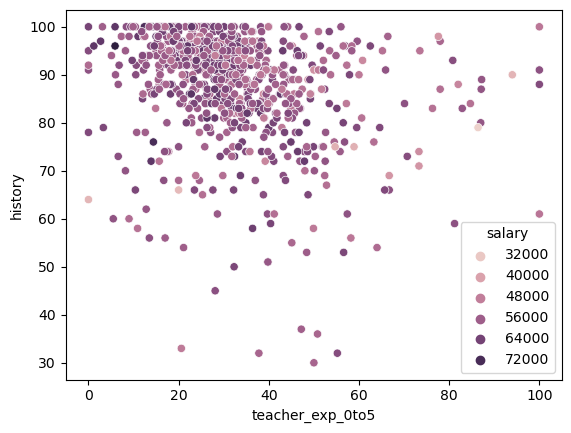

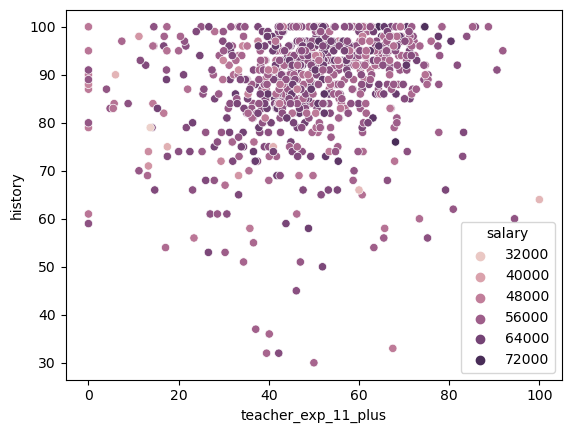

In [18]:
for i in x_axis:
    sns.scatterplot(x= train[i], y= train['history'], data= train, hue= train['salary'])
    plt.show()

In [20]:
train['salary'].mean()

58004.34447300771

In [ ]:
# Q1: Does higher spending on extracurricular activities lead to higher scores?

pf.t_test_one_tailed(train.history, train.extracurricular_expend)


In [ ]:
# Q2: Do lower percentage of economic disadvantage general result in higher overall schools?

pf.t_test_one_tailed(train.econdis, train.history)

In [ ]:
# Q3: Does higher than bachelor's education make a difference in history staar scores?

pf.t_test_one_tailed(train.high_edu, train.history)

In [ ]:
pf.one_sample_ttest(train.econdis, train.history.mean)

In [ ]:
# Q4: Do the difference levels of teacher experience correlate with higher scores?  Is one of them stronger than the others?
pf.t_test_one_tailed(train.teacher_exp_0to5, train.history)

In [ ]:
pf.t_test_one_tailed(train.teacher_exp_6to10, train.history)

In [28]:
pf.t_test_one_tailed(train.teacher_exp_11_plus, train.history)

Reject the null hypothesis


(-56.016747128412476, 0.0)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='student_teacher_ratio', ylabel='history'>

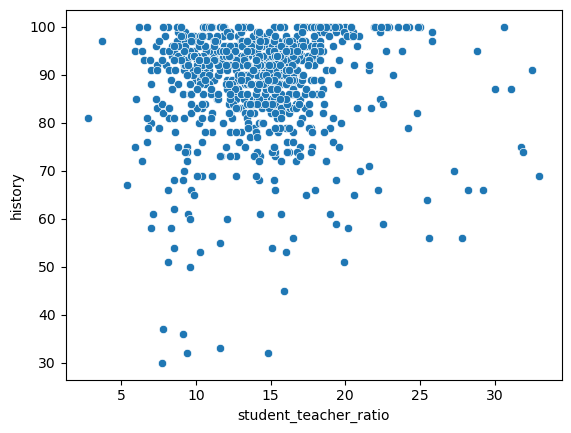

In [27]:
sns.scatterplot(train.student_teacher_ratio, train.history)

<AxesSubplot:xlabel='student_teacher_ratio', ylabel='Count'>

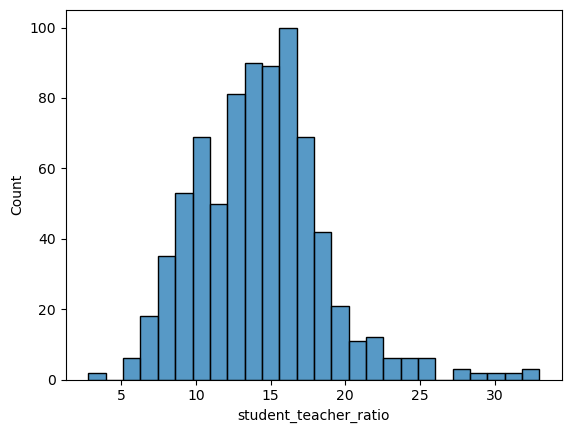

In [32]:
sns.histplot(train.student_teacher_ratio)

In [ ]:
stats.ttest_1samp()

In [33]:
#pearson student teach ratio to history 

p, r2 = stats.pearsonr(x= train.student_teacher_ratio, y= train.history)

In [34]:
p, r2
#weak correlation

(0.03425185441028367, 0.34002347107537545)

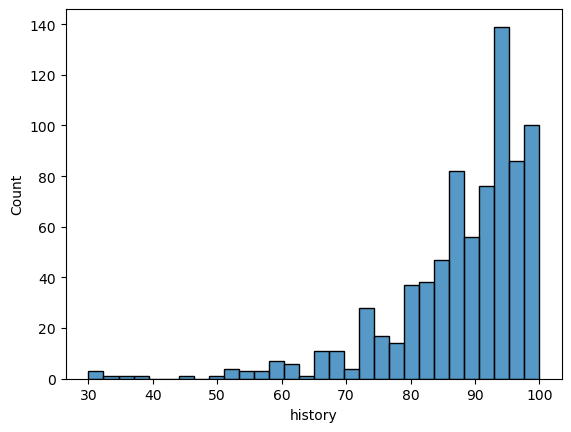

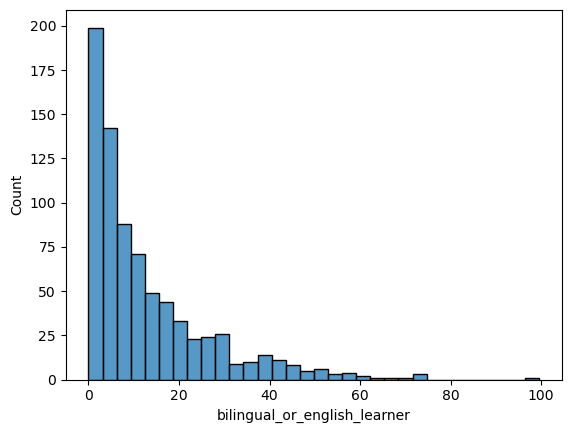

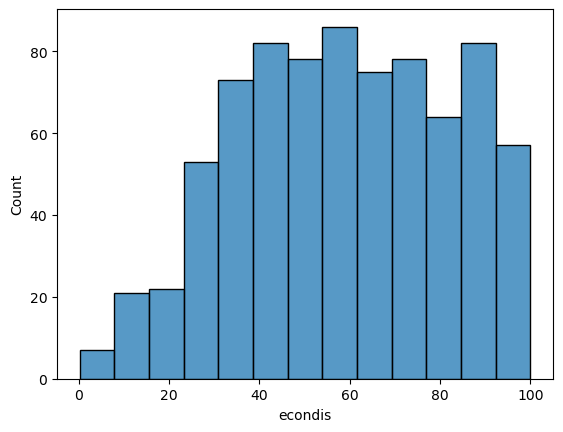

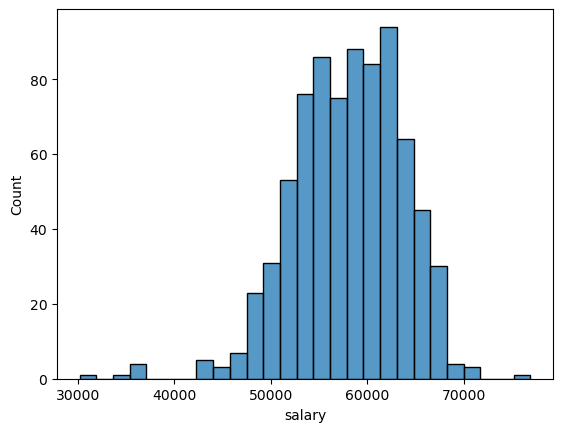

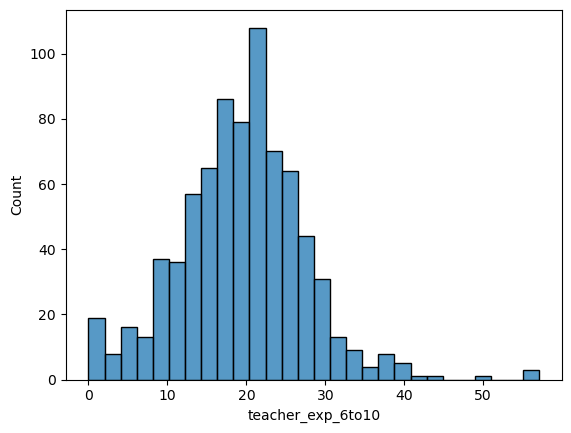

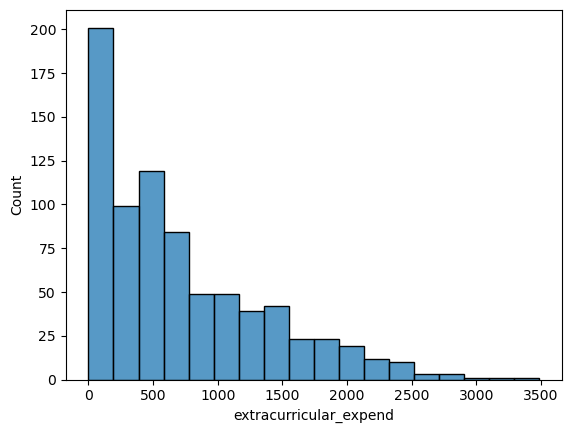

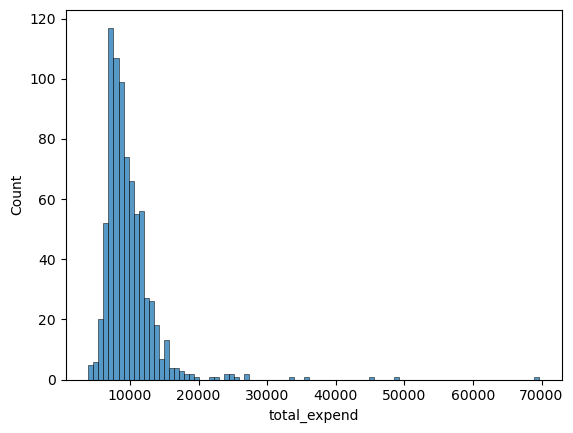

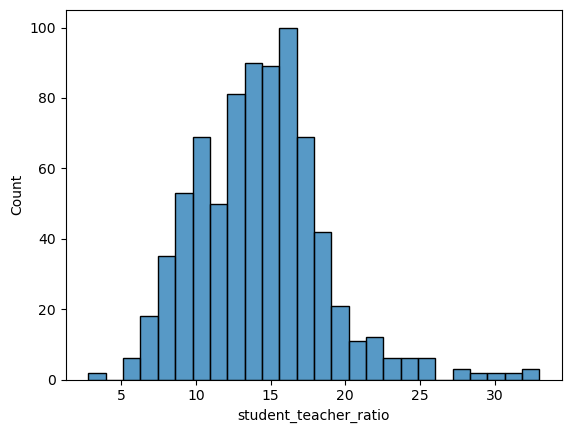

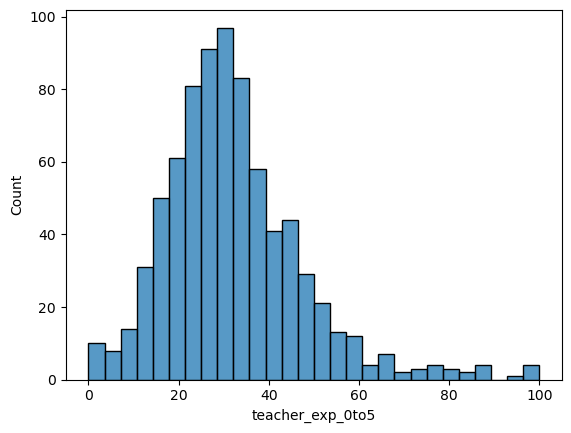

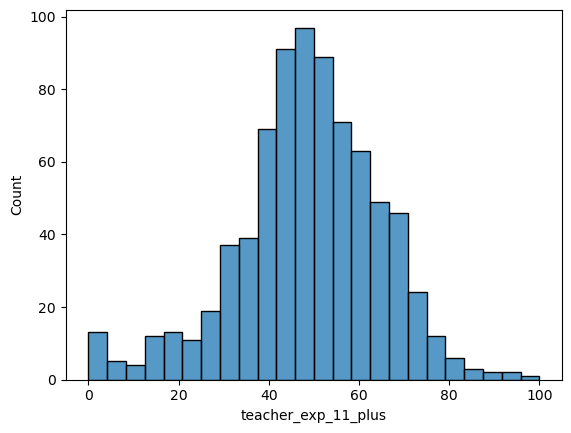

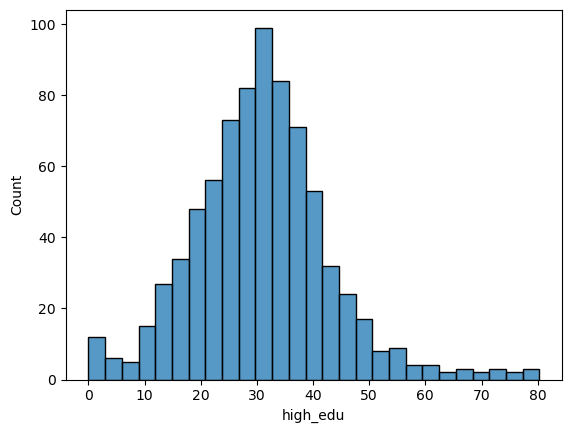

In [37]:
for i in train.columns:
    sns.histplot(train[i])
    plt.show()

In [51]:
# perform pearson's r on all normally distributed features.  look for corr with history

normally_distributed = [['high_edu', 'teacher_exp_0to5', 'teacher_exp_11_plus', 'salary']]

p, r2 = stats.pearsonr(x= train['high_edu'], y= train['history'])
p, r2
    

(0.12548416460730788, 0.00045092149084829594)

In [52]:
p, r2 = stats.pearsonr(x= train['teacher_exp_0to5'], y= train['history'])
p, r2

(-0.2462405512561904, 3.289253205604054e-12)

In [53]:
p, r2 = stats.pearsonr(x= train['teacher_exp_11_plus'], y= train['history'])
p, r2

(0.18729525673964098, 1.4218825491011975e-07)

In [54]:
p, r2 = stats.pearsonr(x= train['salary'], y= train['history'])
p, r2

(0.11464045301452042, 0.0013598011356173727)

In [55]:
p, r2 = stats.pearsonr(x= train.student_teacher_ratio, y= train.history)
p, r2

(0.03425185441028367, 0.34002347107537545)

In [57]:
p, r2 = stats.pearsonr(x= train.econdis, y= train.history)
p, r2

(-0.4405616626586554, 2.810585738543152e-38)

In [58]:
pd.read_html('https://rptsvr1.tea.texas.gov/cgi/sas/broker?_service=marykay&_service=appserv&_debug=0&_program=sfadhoc.new_Campus_actual21.sas&which_camp=161920001')

[                                0  \
 0                             NaN   
 1                             NaN   
 2  Total Enrolled Membership: 849   
 3                 Download: Excel   
 4                             PDF   
 
                                                                                                           1  \
 0  2020-2021 PEIMS ACTUAL FINANCIAL DATA BY CAMPUS TOTALS FOR CHINA SPRING H S (161920001) CHINA SPRING ISD   
 1                                                                                                       NaN   
 2                                                                            Total Enrolled Membership: 849   
 3                                                                                           Download: Excel   
 4                                                                                                       PDF   
 
                                                                                                